In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
%store -r data_df

In [9]:
df = data_df.loc['2017-01-01':'2020-01-01']
data = df['Nord Pool Lietuva']

In [14]:
df = data_df.loc['2019-01-01':'2020-01-01']
data = df['decomposition_residuals_365d'] #switching var = true

In [35]:
df = data_df.loc['2017-01-01':'2020-01-01']
data = df['decomposition_residuals_7d'] #switching var = true

In [20]:
df = data_df.loc['2017-01-01':'2020-01-01']
data = df['decomposition_residuals_365d_7d'] #switching var = true

In [59]:
df = data_df.loc['2019-01-01':'2020-01-01']
data = df['Nord Pool Lietuva']

<AxesSubplot:title={'center':'Growth rate of Real GNP'}, xlabel='Time'>

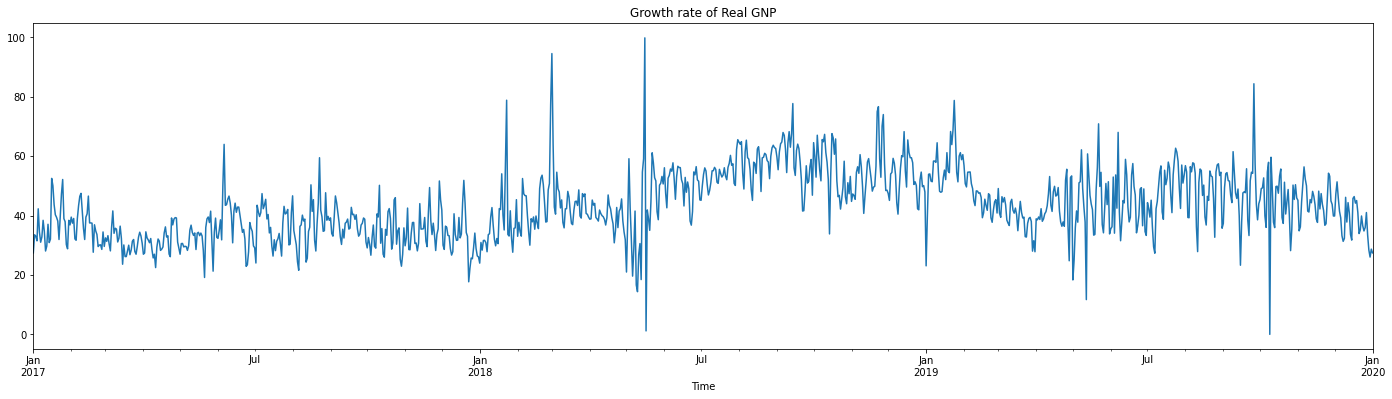

In [4]:
data.plot(title='Growth rate of Real GNP', figsize=(24,6))

In [16]:
mod_hamilton = sm.tsa.MarkovAutoregression(data, k_regimes=2, order=2, switching_ar=False, switching_variance=True)
res_hamilton = mod_hamilton.fit()

In [17]:
res_hamilton.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Markov Switching Model Results                             
========================================================================================
Dep. Variable:     decomposition_residuals_365d   No. Observations:                  364
Model:                     MarkovAutoregression   Log Likelihood               -1190.733
Date:                          Wed, 10 Feb 2021   AIC                           2397.466
Time:                                  12:05:08   BIC                           2428.643
Sample:                              01-01-2019   HQIC                          2409.858
                                   - 01-01-2020                                         
Covariance Type:                         approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9254      0.581      3.315      0.001       0.787       3.064
sigma2        21.5463      2.862      7.529      0.000      15.937      27.155
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1248      2.235     -2.293      0.022      -9.505      -0.745
sigma2       164.4314     40.934      4.017      0.000      84.202     244.661
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5869      0.058     10.077      0.000       0.473       0.701
ar.L2         -0.1534      0.055     -2.814      0.005      -0.260      -0.047
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9539      0.021     46.435      0.000       0.914       0.994
p[1->0]        0.1914      0.094      2.042      0.041       0.008       0.375
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [18]:
res_hamilton.filtered_marginal_probabilities

,0,1
Time,,
2019-01-03,0.882795,0.117205
2019-01-04,0.952672,0.047328
2019-01-05,0.951244,0.048756
2019-01-06,0.967610,0.032390
2019-01-07,0.980968,0.019032
...,...,...
2019-12-28,0.902496,0.097504
2019-12-29,0.936783,0.063217
2019-12-30,0.942170,0.057830


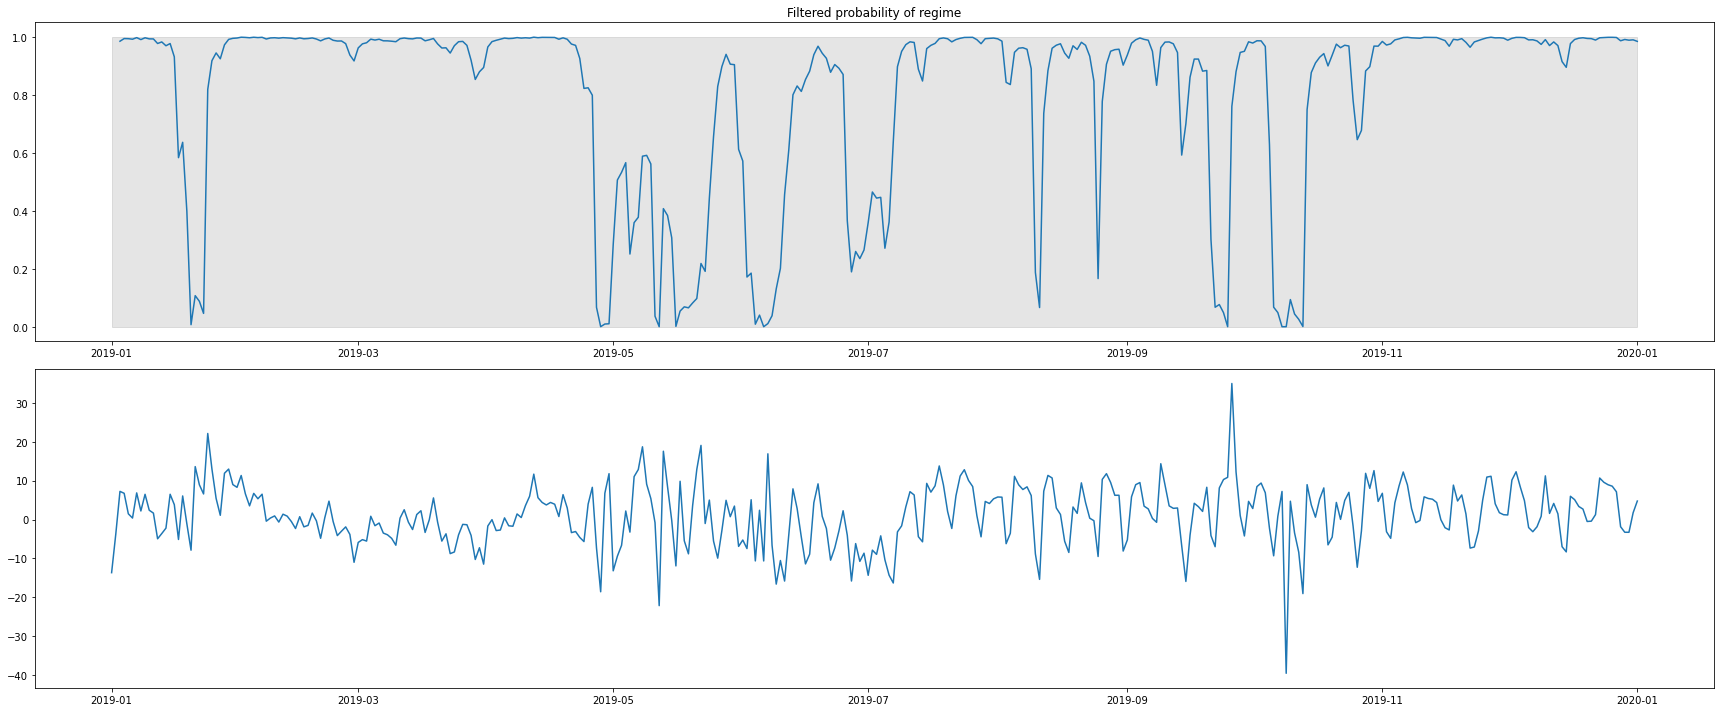

In [19]:
fig, axes = plt.subplots(2, figsize=(24,10))
ax = axes[0]
ax.plot(res_hamilton.smoothed_marginal_probabilities[0])
ax.fill_between(data.index, 0, 1, where=data.values, color='k', alpha=0.1)
ax.set(title='Filtered probability of regime')

ax = axes[1]
ax.plot(data)

fig.tight_layout()

In [34]:
res_hamilton.predict()

Time
2017-01-03    3.074143
2017-01-04    0.927439
2017-01-05   -0.084857
2017-01-06    4.582343
2017-01-07   -1.044355
                ...   
2019-12-28    3.821177
2019-12-29   -1.221530
2019-12-30   -1.386528
2019-12-31   -1.292430
2020-01-01    1.576650
Freq: D, Length: 1094, dtype: float64